# Data wrangling : WeRateDogs

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import matplotlib as pl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
% matplotlib inline

##  Gathering data

### 1- WeRateDogs Twitter archive

In [2]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### 2- tweet image predictions using requests

In [ ]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('/Users/m3adh/Desktop/nano/project 4/project/image_predictions.tsv',"wb")as file:
    file.write(response.content)

In [3]:
df_image_predictions = pd.read_csv('image_predictions.tsv',sep='\t')

### 3- tweet's retweet count and favorite

In [4]:
ckey=""
csecret=""
atoken=""
asecret=""
auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [5]:
tweet_id = list(df_twitter_archive.tweet_id)
with open('tweet_json.txt',"a") as tweets :
     for ID in tweet_id:
        try:
            tweet = api.get_status(ID,tweet_mode='extended')
            json.dump(tweet._json, tweets)
            tweets.write('\n')
        except Exception as e:
            print(e,ID)

[{'code': 144, 'message': 'No status found with that ID.'}] 888202515573088257
[{'code': 144, 'message': 'No status found with that ID.'}] 873697596434513921
[{'code': 144, 'message': 'No status found with that ID.'}] 872668790621863937
[{'code': 144, 'message': 'No status found with that ID.'}] 872261713294495745
[{'code': 144, 'message': 'No status found with that ID.'}] 869988702071779329
[{'code': 144, 'message': 'No status found with that ID.'}] 866816280283807744
[{'code': 144, 'message': 'No status found with that ID.'}] 861769973181624320
[{'code': 144, 'message': 'No status found with that ID.'}] 856602993587888130
[{'code': 144, 'message': 'No status found with that ID.'}] 845459076796616705
[{'code': 144, 'message': 'No status found with that ID.'}] 844704788403113984
[{'code': 144, 'message': 'No status found with that ID.'}] 842892208864923648
[{'code': 144, 'message': 'No status found with that ID.'}] 837012587749474308
[{'code': 144, 'message': 'No status found with that

Rate limit reached. Sleeping for: 365


[{'code': 144, 'message': 'No status found with that ID.'}] 754011816964026368
[{'code': 144, 'message': 'No status found with that ID.'}] 680055455951884288


Rate limit reached. Sleeping for: 363


### Error number 144 means (Corresponds with HTTP 404. The requested Tweet ID is not found (if it existed, it was probably deleted))

Source : https://developer.twitter.com/en/docs/basics/response-codes.html

In [6]:
tweets_list =[]

with open('tweet_json.txt') as json_file:
    for line in json_file:
        tweets_dict = {}
        tweets_json = json.loads(line)
        tweets_dict['tweet_id'] = tweets_json['id']
        tweets_dict['retweet_count'] = tweets_json['retweet_count']
        tweets_dict['favorite_count'] = tweets_json['favorite_count']
        tweets_list.append(tweets_dict)
df_ret_fav = pd.DataFrame(tweets_list,columns=['tweet_id','favorite_count','retweet_count'])



## Assessing data

In [7]:
df_twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [8]:
print(df_twitter_archive.doggo.value_counts())
print(df_twitter_archive.floofer.value_counts())
print(df_twitter_archive.pupper.value_counts())
print(df_twitter_archive.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [9]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df_twitter_archive[df_twitter_archive['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [11]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
df_twitter_archive[df_twitter_archive['rating_numerator']>14]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [13]:
df_twitter_archive[df_twitter_archive['tweet_id']==854010172552949760]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [14]:
df_twitter_archive[df_twitter_archive['tweet_id']==666287406224695296]['rating_numerator']

2335    1
Name: rating_numerator, dtype: int64

In [15]:
df_twitter_archive[(df_twitter_archive['rating_denominator']>10)|(df_twitter_archive['rating_denominator']<10)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [16]:
df_ret_fav.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,37714,8217
1,892177421306343426,32385,6076
2,891815181378084864,24385,4019
3,891689557279858688,41025,8371
4,891327558926688256,39214,9077


In [17]:
df_ret_fav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null int64
favorite_count    2339 non-null int64
retweet_count     2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [18]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
df_image_predictions[df_image_predictions['tweet_id'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [20]:
df_image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [21]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Quality
##### `Twitter archive` table
- Contain some text on the replay or retweet Must be removed.
- The text id (666287406224695296) it has a rating of 9/10 but in the rating_numerator column it wrote 1.
- The text id (786709082849828864) It has a rating of 9.75 but in the rating_numerator column it wrote 75.
- The text id (778027034220126208) It has a rating of 11.27/10 but in the rating_numerator column it wrote 27
- Column rating_numerator contains a rating greater than 14 Must be removed.
- Column rating_denominator contains a rating greater than 10 and Smaller then 10 Must be removed.
- Convert the timestamp variable from object to dataframe.
- There are missing values in column expanded_urls but most of them contain retweet or replies and we will fix the missing values after deleting the retweet and replies.
- Change the name of the rating_numerator column to dog_ratin_of_10 and delete the rating_denominator column.
- Delete the columns (in_reply_to_status_id,in_reply_to_user_id,source,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_denominator,,)


##### `image predictions` table
- Delete the rows that contain the false column p1_dog.
- Change the name p1 column to Dog_Type.
- Change the name of the jpg_url column to Image_Link.



#### Tidiness
- In the image classification table we are interested in the highest predictive ratio and we will only take the p1 column
- Four columns constitute one variable in `Twitter archive` (doggo,floofer,pupper,puppo)
- All three tables must be merged

## Cleaning data

In [22]:
df_archive_clean = df_twitter_archive.copy()
df_image_pre_clean = df_image_predictions.copy()
df_ret_fav_clean = df_ret_fav.copy()

#### `Twitter archive` replay and retweet.

##### Define
Contain some text on the replay and retweet Must be removed.

##### Code

In [23]:
# Delete replay and retweet 
df_archive_clean = df_archive_clean[df_archive_clean['in_reply_to_status_id'].isnull()]
df_archive_clean = df_archive_clean[df_archive_clean['retweeted_status_id'].isnull()]

##### Test

In [24]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

#### `Twitter archive` There are missing values in column expanded_urls

##### Define
There are missing values in column expanded_urls but most of them contain retweet or replies and we will fix the missing values after deleting the retweet and replies.


##### Code

In [25]:
df_archive_clean[df_archive_clean.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


In [26]:
df_archive_clean[df_archive_clean['tweet_id']==666287406224695296]['expanded_urls'].values

array(['https://twitter.com/dog_rates/status/666287406224695296/photo/1'],
      dtype=object)

In [27]:
expanded_urls_null = list(df_archive_clean[df_archive_clean.expanded_urls.isnull()]['tweet_id'])
for ID in expanded_urls_null:
    df_archive_clean.loc[df_archive_clean['tweet_id'] == ID, 'expanded_urls']=str('https://twitter.com/dog_rates/status/{}/photo/1'.format(ID))

##### Test

In [28]:
for ID in expanded_urls_null:
    print( ID ,df_archive_clean[df_archive_clean['tweet_id']==ID]['expanded_urls'].values , '\n')    

828361771580813312 ['https://twitter.com/dog_rates/status/828361771580813312/photo/1'] 

785515384317313025 ['https://twitter.com/dog_rates/status/785515384317313025/photo/1'] 

696518437233913856 ['https://twitter.com/dog_rates/status/696518437233913856/photo/1'] 



#### `Twitter archive` Edit ratings error.

##### Define
- The text id (666287406224695296) it has a rating of 9/10 but in the rating_numerator column it wrote 1/2.
- The text id (786709082849828864) It has a rating of 9.75 but in the rating_numerator column it wrote 75.
- The text id (778027034220126208) It has a rating of 11.27/10 but in the rating_numerator column it wrote 27

##### Code

In [29]:
df_archive_clean.rating_numerator = df_archive_clean.rating_numerator.replace(1,9)
df_archive_clean.rating_denominator = df_archive_clean.rating_denominator.replace(2,10)
df_archive_clean.rating_numerator = df_archive_clean.rating_numerator.replace(75,10)
df_archive_clean.rating_numerator = df_archive_clean.rating_numerator.replace(27,11)

##### Test

In [30]:
print(df_archive_clean[df_archive_clean['tweet_id']==666287406224695296]['rating_numerator'])
print(df_archive_clean[df_archive_clean['tweet_id']==786709082849828864]['rating_numerator'])
print(df_archive_clean[df_archive_clean['tweet_id']==778027034220126208]['rating_numerator'])

2335    9
Name: rating_numerator, dtype: int64
695    10
Name: rating_numerator, dtype: int64
763    11
Name: rating_numerator, dtype: int64


#### `Twitter archive` rating greater than 14.

##### Define
Column rating_numerator contains a rating greater than 14 Must be removed.

##### Code

In [31]:
df_archive_clean = df_archive_clean[df_archive_clean['rating_numerator']<=14]

##### Test

In [32]:
df_archive_clean[df_archive_clean['rating_numerator']>14]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### `Twitter archive` rating_denominator contains a rating greater than 10 and Smaller then 10.

##### Define
Column rating_denominator contains a rating greater than 10 and Smaller then 10 Must be removed.

##### Code

In [33]:
df_archive_clean = df_archive_clean[df_archive_clean['rating_denominator']==10]

##### Test

In [34]:
df_archive_clean[(df_archive_clean['rating_denominator']<10)|(df_archive_clean['rating_denominator']>10)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### `Twitter archive` Convert the timestamp variable.

##### Define
Convert the timestamp variable from object to dataframe.

##### Code

In [35]:
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

##### Test

In [36]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2078 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2078 non-null datetime64[ns]
source                        2078 non-null object
text                          2078 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2078 non-null object
rating_numerator              2078 non-null int64
rating_denominator            2078 non-null int64
name                          2078 non-null object
doggo                         2078 non-null object
floofer                       2078 non-null object
pupper                        2078 non-null object
puppo                         2078 non-null object
dtypes: datetime64[ns](1), float

`image predictions`Delete the rows that contain the false column p1_dog.

##### Define
You must delete rows that contain False Because the picture is not for a dog.

##### Code

In [37]:
df_image_pre_clean = df_image_pre_clean[df_image_pre_clean['p1_dog']==True]

##### Test

In [38]:
df_image_pre_clean.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

##### Define
Delete the columns (in_reply_to_status_id,in_reply_to_user_id,source,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_denominator)

##### Code

In [39]:
df_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','rating_denominator'],axis=1,inplace=True)

##### Test

In [40]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id            2078 non-null int64
timestamp           2078 non-null datetime64[ns]
text                2078 non-null object
expanded_urls       2078 non-null object
rating_numerator    2078 non-null int64
name                2078 non-null object
doggo               2078 non-null object
floofer             2078 non-null object
pupper              2078 non-null object
puppo               2078 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 178.6+ KB


#### Four columns constitute one variable in `Twitter archive` (doggo,floofer,pupper,puppo)

##### Define
Four columns constitute one variable in `Twitter archive` (doggo,floofer,pupper,puppo)

##### Code

In [41]:
#We select rows that contain values in (doggo,floofer,pupper,puppo) and merge the values into one column
archive_Age_stage_value = df_archive_clean[(df_archive_clean['pupper']=='pupper')|(df_archive_clean['doggo']=='doggo')|
                         (df_archive_clean['puppo']=='puppo')|(df_archive_clean['floofer']=='floofer')]
archive_Age_stage_value = pd.melt(archive_Age_stage_value, id_vars=['tweet_id','timestamp','text','expanded_urls',
                                                                    'rating_numerator','name'],value_name='Age_stage')
archive_Age_stage_value = archive_Age_stage_value[archive_Age_stage_value['Age_stage']!='None']
archive_Age_stage_value.drop(['variable'],axis = 1 , inplace = True)

In [42]:
archive_Age_stage_value.shape

(347, 7)

In [43]:
#There are rows that contain more than one value in columns (doggo,floofer,pupper,puppo)
#We will look at each row
archive_Age_stage_value[archive_Age_stage_value.tweet_id.duplicated()]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,name,Age_stage
360,854010172552949760,2017-04-17 16:34:26,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,None,floofer
735,817777686764523521,2017-01-07 16:59:28,"This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,Dido,pupper
744,808106460588765185,2016-12-12 00:29:28,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,None,pupper
749,801115127852503040,2016-11-22 17:28:25,This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,Bones,pupper
763,785639753186217984,2016-10-11 00:34:48,This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,Pinot,pupper
768,781308096455073793,2016-09-29 01:42:20,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12,None,pupper
789,759793422261743616,2016-07-31 16:50:42,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,Maggie,pupper
802,751583847268179968,2016-07-09 01:08:47,Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,None,pupper
828,741067306818797568,2016-06-10 00:39:48,This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,just,pupper
841,733109485275860992,2016-05-19 01:38:16,"Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12,None,pupper


In [44]:
#This is an example of a single row that contains two values in a doggo and floofer column
df_archive_clean[df_archive_clean['tweet_id']==854010172552949760]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
200,854010172552949760,2017-04-17 16:34:26,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,None,doggo,floofer,None,None


In [45]:
ids = list(archive_Age_stage_value[archive_Age_stage_value.tweet_id.duplicated()]['tweet_id'])
for i in ids:
    print( i ,archive_Age_stage_value[archive_Age_stage_value['tweet_id']==i]['text'].values , '\n')

854010172552949760 ["At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"
 "At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"] 

817777686764523521 ['This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7'
 'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7'] 

808106460588765185 ['Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho'
 'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at sa

##### We will delete some rows and process rows with errors in the registry
854010172552949760 ->Floofer

817777686764523521 ->Pupper

801115127852503040 ->pupper  

751583847268179968 ->put nan

855851453814013952 ->puppo

(733109485275860992,785639753186217984,781308096455073793,759793422261743616,808106460588765185)->Delete rows


In [46]:
#Delete rows
id_drop=[733109485275860992,785639753186217984,781308096455073793,759793422261743616,808106460588765185]
df_archive_clean = df_archive_clean[~df_archive_clean.tweet_id.isin(id_drop)]

In [47]:
#Correction of wrong values
list_id=[854010172552949760,817777686764523521,801115127852503040,751583847268179968,855851453814013952]
for ID in list_id:
    if (ID ==751583847268179968):
        df_archive_clean.loc[df_archive_clean['tweet_id'] == ID, 'pupper',] = 'None'
        df_archive_clean.loc[df_archive_clean['tweet_id'] == ID, 'doggo'] = 'None'
    else:
        df_archive_clean.loc[df_archive_clean['tweet_id'] == ID, 'doggo'] = 'None'

In [48]:
#We select rows that contain values in (doggo,floofer,pupper,puppo) and merge the values into one column
archive_Age_stage_value = df_archive_clean[(df_archive_clean['pupper']=='pupper')|(df_archive_clean['doggo']=='doggo')|
                         (df_archive_clean['puppo']=='puppo')|(df_archive_clean['floofer']=='floofer')]
archive_Age_stage_value = pd.melt(archive_Age_stage_value, id_vars=['tweet_id','timestamp','text','expanded_urls','rating_numerator',
                                            'name'],value_name='Age_stage')
archive_Age_stage_value = archive_Age_stage_value[archive_Age_stage_value['Age_stage']!='None']
archive_Age_stage_value.drop(['variable'],axis = 1 , inplace = True)

In [49]:
#We select rows that Null values in (doggo,floofer,pupper,puppo)
archive_Age_stage_Null = df_archive_clean[(df_archive_clean['pupper']!='pupper')&(df_archive_clean['doggo']!='doggo')&
                         (df_archive_clean['puppo']!='puppo')&(df_archive_clean['floofer']!='floofer')]
archive_Age_stage_Null.drop(['doggo','floofer','pupper','puppo'],axis = 1 , inplace = True)
archive_Age_stage_Null['Age_stage'] = str('NaN')

/Users/m3adh/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/m3adh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [50]:
archive_Age_stage_Null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1743 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id            1743 non-null int64
timestamp           1743 non-null datetime64[ns]
text                1743 non-null object
expanded_urls       1743 non-null object
rating_numerator    1743 non-null int64
name                1743 non-null object
Age_stage           1743 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 108.9+ KB


In [51]:
archive_Age_stage_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 1146
Data columns (total 7 columns):
tweet_id            331 non-null int64
timestamp           331 non-null datetime64[ns]
text                331 non-null object
expanded_urls       331 non-null object
rating_numerator    331 non-null int64
name                331 non-null object
Age_stage           331 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 20.7+ KB


In [52]:
archive_Age_stage_Null.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,name,Age_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN


In [53]:
archive_Age_stage_value.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,name,Age_stage
0,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,Cassie,doggo
4,884162670584377345,2017-07-09 21:29:42,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,Yogi,doggo
13,872967104147763200,2017-06-09 00:02:31,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,None,doggo
15,871515927908634625,2017-06-04 23:56:03,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,Napolean,doggo
16,871102520638267392,2017-06-03 20:33:19,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14,None,doggo


In [54]:
df_archive_clean = archive_Age_stage_Null.append(archive_Age_stage_value)
df_archive_clean.reset_index(drop=True, inplace=True);

In [55]:
df_archive_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,name,Age_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN


##### Test

In [56]:
df_archive_clean.shape

(2074, 7)

In [57]:
df_image_pre_clean.drop(['p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1,inplace=True)

In [58]:
df_image_pre_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id    1532 non-null int64
jpg_url     1532 non-null object
img_num     1532 non-null int64
p1          1532 non-null object
p1_conf     1532 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 71.8+ KB


In [59]:
df_archive_clean = archive_Age_stage_Null.append(archive_Age_stage_value)

In [60]:
df = pd.merge(df_archive_clean, df_image_pre_clean,on=['tweet_id'], how='inner')

In [61]:
twitter_archive_master = pd.merge(df, df_ret_fav_clean,on=['tweet_id'], how='inner')

In [62]:
twitter_archive_master.rename(columns={'jpg_url': 'Image_Link', 'p1': 'Dog_Type'}, inplace=True)

In [62]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

In [63]:
df = pd.read_csv('twitter_archive_master.csv')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 13 columns):
tweet_id            1444 non-null int64
timestamp           1444 non-null object
text                1444 non-null object
expanded_urls       1444 non-null object
rating_numerator    1444 non-null int64
name                1444 non-null object
Age_stage           224 non-null object
Image_Link          1444 non-null object
img_num             1444 non-null int64
Dog_Type            1444 non-null object
p1_conf             1444 non-null float64
favorite_count      1444 non-null int64
retweet_count       1444 non-null int64
dtypes: float64(1), int64(5), object(7)
memory usage: 146.7+ KB


In [65]:
df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,name,Age_stage,Image_Link,img_num,Dog_Type,p1_conf,favorite_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,32385,6076
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,24385,4019
2,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,39214,9077
3,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,19714,3010
4,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,11530,1989


In [66]:
#Compare the average retweet and favorite with the ratings
favorite_count = df.groupby('rating_numerator')['favorite_count'].mean()
retweet_count = df.groupby('rating_numerator')['retweet_count'].mean()

In [67]:
ind = np.arange(len(favorite_count))  # the x locations for the groups
width = 0.40       # the width of the bars

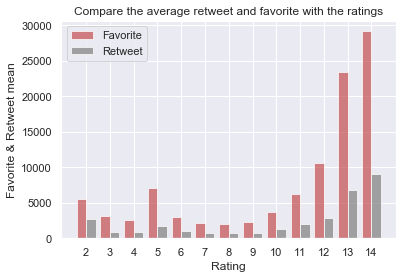

In [68]:
#Compare the average retweet and favorite with the ratings
# plot bars
plt.figsize=(7,7)
favorite_bars = plt.bar(ind, favorite_count, width, color='r', alpha=.7, label='Favorite')
retweet_bars = plt.bar(ind + width, retweet_count, width, color='gray', alpha=.7, label='Retweet')

# title and labels
plt.ylabel('Favorite & Retweet mean')
plt.xlabel('Rating')
plt.title('Compare the average retweet and favorite with the ratings')
locations = ind + width / 2  # xtick locations
labels = ['2','3', '4', '5', '6', '7', '8', '9','10','11','12','13','14']  # xtick labels
plt.xticks(locations, labels)
# legend
plt.legend();

### From the graph we note a correlation between the rating and the number of retweet and favorite, if the rating increases the Increase number of retweet and favorite but note a decrease in retweet and favorite when ratings (7, 8, 9).

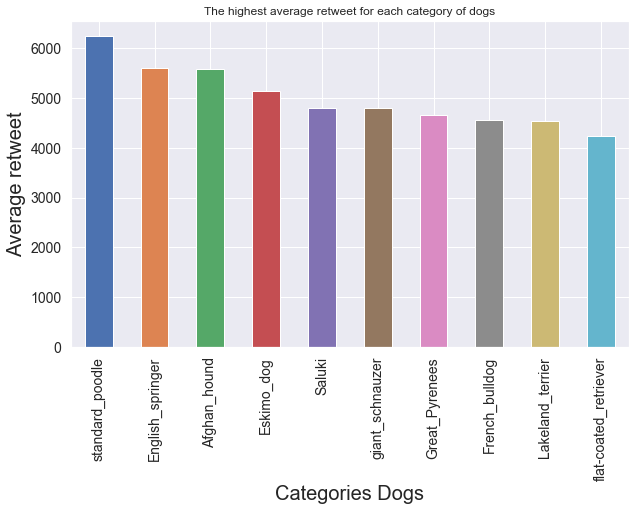

In [69]:
#The highest average retweet for each category of dogs
retweet_mean =df.groupby('Dog_Type')['retweet_count'].mean().sort_values(ascending=False)[:10].plot(kind='bar',title='The highest average retweet for each category of dogs',fontsize = 14,figsize=(10, 6));
plt.xlabel('Categories Dogs',fontsize = 20)
plt.ylabel('Average retweet',fontsize = 20);

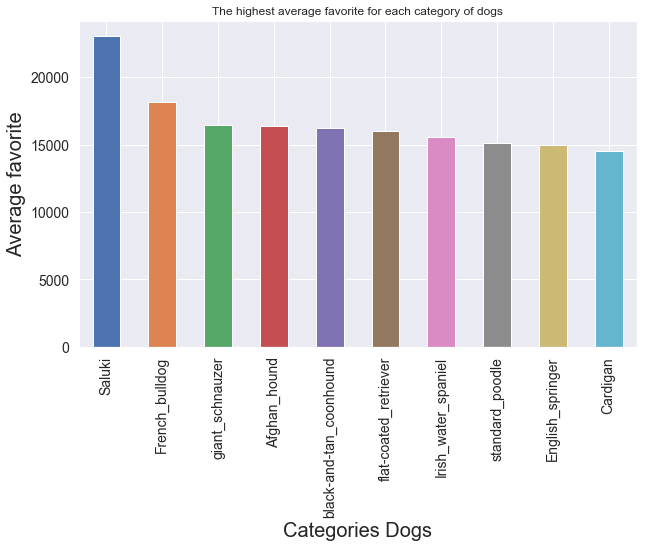

In [70]:
#The highest average favorite for each category of dogs
favorite_mean =df.groupby('Dog_Type')['favorite_count'].mean().sort_values(ascending=False)[:10].plot(kind='bar',title='The highest average favorite for each category of dogs',fontsize = 14,figsize=(10, 6));
plt.xlabel('Categories Dogs',fontsize = 20)
plt.ylabel('Average favorite',fontsize = 20);

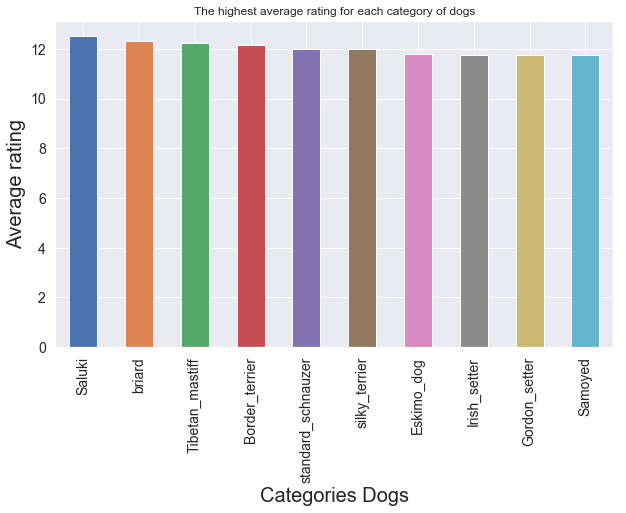

In [71]:
#The highest average rating for each category of dogs
rating_mean = df.groupby('Dog_Type')['rating_numerator'].mean().sort_values(ascending=False)[:10].plot(kind='bar',title='The highest average rating for each category of dogs',fontsize = 14,figsize=(10, 6));
plt.xlabel('Categories Dogs',fontsize = 20)
plt.ylabel('Average rating',fontsize = 20);